## Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

from textblob import TextBlob

# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()
from nltk.corpus import stopwords



# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

## Data Reading and Preprocessing

#### Data Reading

In [ ]:
complete_data  =  pd.read_csv('data.csv')
complete_data.head()

,textID,text,sentiment
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral
3,6099baf6e8,I don`t think will want to come back (guys r...,negative
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral


#### **EDA**

###### **Sentiment Class Distribution:**

In [ ]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18899 entries, 0 to 18898
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     18899 non-null  object
 1   text       18898 non-null  object
 2   sentiment  18899 non-null  object
dtypes: object(3)
memory usage: 443.1+ KB


In [ ]:
complete_data.dropna(inplace=True)

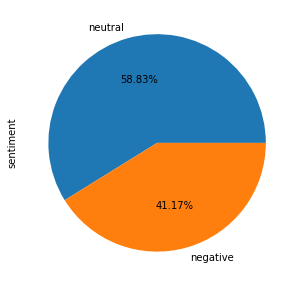

In [ ]:
complete_data.sentiment.value_counts().plot(kind = 'pie', autopct = '%.2f%%',figsize = (5,5))

#### **Data Preprocessing**

*   Step 1 : Changing all the tweets into lowercase
*   Step 2 : Apostrophe,Short Word and Emoticon Lookup
*   Step 3 : Removing anything except letters
*   Step 4 : Removing http links
*   Step 5 : Removing www related words
*   Step 6 : Removing web address/ url
*   Step 7 : Removing everything except a word or a space
*   Step 8 : Removing everything except numbers and letters
*   Step 9 : Removing words whom length is 1
*   Step 10 : Removing stopwords from the text 
*   Step 11 : Lemmatizing the remaining text

In [ ]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
# apostrophe_dict

In [ ]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [ ]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [ ]:
def lookup_dict(text, dictionary1,dictionary2,dictionary3):

    for word in text.split():
        if word in dictionary1: 
          text = text.replace(word, dictionary1[word])
        elif word in dictionary2:
          text = text.replace(word, dictionary2[word])
        elif word in dictionary3:
          text = text.replace(word, dictionary3[word])
    
    return text

In [ ]:
import spacy

def creating_lemmas(x):
  # print(x)
  nlp = spacy.load('en')
  count = 0
  doc = nlp(x)
  all_tokens = []
  for token in doc:
    count+=1
    # print(count)
    if token.is_stop != True:
      all_tokens.append(token.lemma_)
  return ' '.join(all_tokens)


In [ ]:
def preprocessing(x, apostrophe_dict, short_word_dict, emoticon_dict,all_stopwords):

  
# Changing all the tweets into lowercase
  x = x.lower()

# Apostrophe,Short Word and Emoticon Lookup
  x = lookup_dict(x,apostrophe_dict, short_word_dict, emoticon_dict)

# Removing anything except letters
  x = re.sub(r'[^a-zA-Z]',' ',x)

# Removing http links
  x = re.sub(r'https?://[A-Za-z0-9./]+', '', x)

# Removing www related words
  x = re.sub(r'www.[^ ]+', '', x)

# Removing web address/ url
  x = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '',x)

# Removing everything except a word or a space
  x = re.sub(r'[^\w\s]',' ',x)

# Removing everything except numbers and letters
  x = re.sub(r'[^a-zA-Z0-9]',' ',x)

# Removing words whom length is 1
  x = ' '.join([w for w in x.split() if len(w)>1])

# Removing stopwords from the text 
  x = [word for word in x.split() if word not in all_stopwords]

  # x = ' '.join(x)
  # print(x)

# Lemmatizing the remaining text
  x = ' '.join([lemmatizing.lemmatize(i) for i in x])

  # x = creating_lemmas(x)

  return x

In [ ]:
from tqdm import tqdm
tqdm.pandas()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
#loading spacy
# sp = spacy.load('en')
# all_stopwords = sp.Defaults.stop_words

all_stopwords = stopwords.words('english')

complete_data['clean_text'] = complete_data['text'].progress_apply((lambda x: preprocessing(x, apostrophe_dict, short_word_dict, emoticon_dict,all_stopwords)))


complete_data.head()

100%|██████████| 18898/18898 [00:03<00:00, 6146.16it/s]


,textID,text,sentiment,clean_text
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral,enough nothing hour
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative,go clothes shopping tomorrow hate serious clot...
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral,bored idea nice site
3,6099baf6e8,I don`t think will want to come back (guys r...,negative,think want come back guy read dm
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral,thomas drinking game tonight work till tomorrow


#### **Feature Engineering**

In [ ]:
def avg_word(sentence):
    words = sentence.split()
    try:
      return (sum(len(word) for word in words)/len(words))
    except:
      print(sentence)

In [ ]:
complete_data['word_count']=complete_data['clean_text'].apply(lambda x: len(str(x).split(" ")))
complete_data['char_count'] = complete_data['clean_text'].str.len()
complete_data = complete_data.loc[complete_data['char_count']!=0]
complete_data['avg_word'] = complete_data['clean_text'].apply(lambda x: avg_word(x))
complete_data['word_density'] = complete_data['char_count'] / (complete_data['word_count']+1)

In [ ]:
from textblob import TextBlob

# complete_data['polarity'] = complete_data.apply(lambda x: TextBlob(x['clean_text']).sentiment.polarity, axis=1)
# complete_data['subjectivity'] = complete_data.apply(lambda x: TextBlob(x['clean_text']).sentiment.subjectivity, axis=1)
del complete_data['textID']

In [ ]:
complete_data.head(20)

,text,sentiment,clean_text,word_count,char_count,avg_word,word_density
0,that`s enough! I`ll do nothing for 2 hours.,neutral,enough nothing hour,3,19,5.666667,4.750000
1,I have to go clothes shopping tomorrow I hate...,negative,go clothes shopping tomorrow hate serious clot...,10,73,6.400000,6.636364
2,i am bored. :| any idea`s of a nice site?,neutral,bored idea nice site,4,20,4.250000,4.000000
3,I don`t think will want to come back (guys r...,negative,think want come back guy read dm,7,32,3.714286,4.000000
4,_thomas if only the drinking game was tonight....,neutral,thomas drinking game tonight work till tomorrow,7,47,5.857143,5.875000
5,my birthday is in 2 days,neutral,birthday day,2,12,5.500000,4.000000
6,I wish the sun would come out...I guess it doe...,negative,wish sun would come guess matter since work en...,10,57,4.800000,5.181818
7,I am very sad because I have gone on the show ...,negative,sad gone show mcfly fan,5,23,3.800000,3.833333
8,no one ever gave me the info I`m sad,negative,one ever gave info sad,5,22,3.600000,3.666667
9,all tubes closed on 9th and 10th of june any ...,neutral,tube closed th th june idea get venue,8,37,3.750000,4.111111


### Ready for Text Analysis

#### **Sentiment Distribution after Preprocessing**

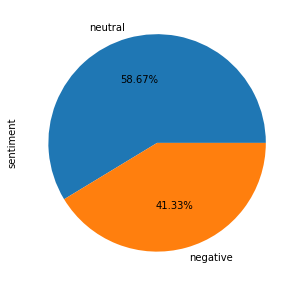

In [ ]:
complete_data.sentiment.value_counts().plot(kind = 'pie', autopct = '%.2f%%',figsize = (5,5))

###We will do our analysis on "Clean_text" column
1. We will see the most commonly used words for the column




**A) Most common words in complete text**

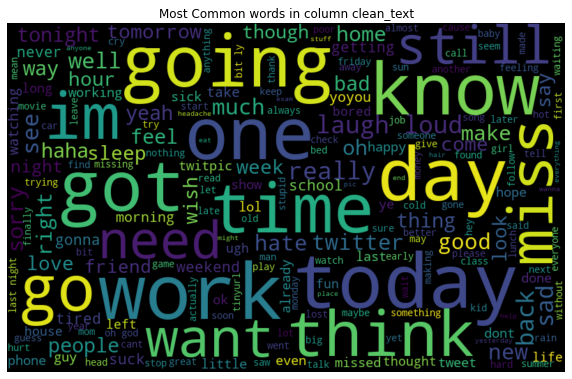

In [ ]:
# Visualizing all the words in column "clean_text" in our data using the wordcloud plot.
all_words = ' '.join([text for text in complete_data['clean_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column clean_text")
plt.show()

**B) Most common words in neutral texts**

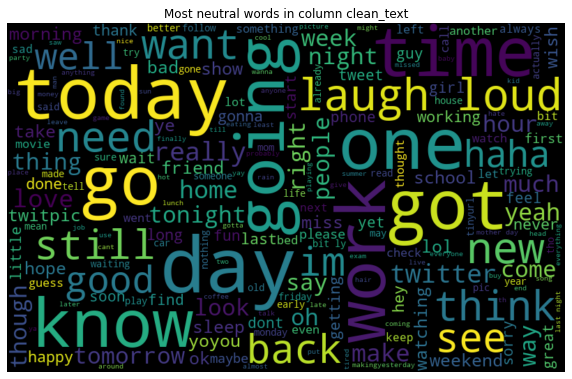

In [ ]:
#Visualizing all the neutral words in column "clean_text" in our data using the wordcloud plot.
positive_words =' '.join([text for text in complete_data['clean_text'][complete_data['sentiment'] == 'neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most neutral words in column clean_text")
plt.show()

**C) Most common words in negative texts**

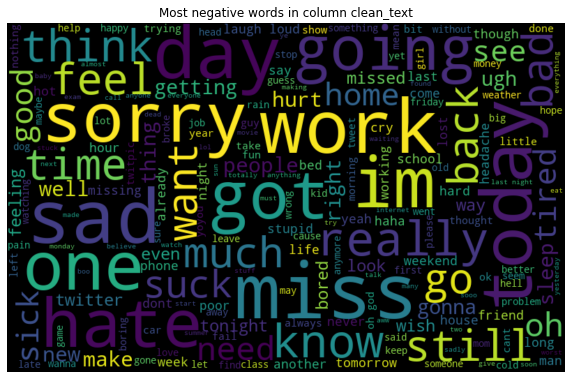

In [ ]:
#Visualizing all all the negative words in column "clean_text" in our data using the wordcloud plot.
normal_words =' '.join([text for text in complete_data['clean_text'][complete_data['sentiment'] == 'negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most negative words in column clean_text")
plt.show()

### Extracting Features from Cleaned Tweets

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True,ngram_range=(1,1),max_features=None)

#Count vectorizer for bigrams
# cv2 = CountVectorizer(binary=True,ngram_range=(1,2),max_features=None)

#Count vectorizer for trigrams
# cv3 = CountVectorizer(binary=True,ngram_range=(1,3),max_features=None)

#TFIDF vectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer(max_features=3000, stop_words=None)
# tfidf_vectorizer
# tfidf_lemm = tfidf_vectorizer.fit_transform(complete_data['clean_text'])
# tfidf_lemm



cv.fit(complete_data['clean_text'])
X = cv.transform(complete_data['clean_text'])
y = complete_data['sentiment']

### Model Building: Text Sentiment Classification

##### XGBOOST Classifier

In [ ]:

# from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_val, y_train, y_val = train_test_split( X,  y, train_size = 0.8,random_state =42)
# X_train, X_val, y_train, y_val = train_test_split( tfidf_lemm,  y, train_size = 0.8,random_state =42)


xgb=xgb.XGBClassifier( learning_rate =0.5,
 n_estimators=500,
 max_depth=2,
 min_child_weight=1,
 gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary',
 nthread=5,
 )


from sklearn.model_selection import cross_val_score

# print("cross_val_score: ", cross_val_score(xgb, X, y, cv=15, n_jobs=-1, verbose=1, scoring='f1_weighted').mean())

xgb.fit(X_train,y_train)


print(classification_report(y_val, xgb.predict(X_val)))

# A1 = f1_score(y_val, xgb.predict(X_val),average='weighted') # calculating f1 score
# print(A1)

              precision    recall  f1-score   support

    negative       0.79      0.59      0.68      1559
     neutral       0.75      0.89      0.82      2205

    accuracy                           0.77      3764
   macro avg       0.77      0.74      0.75      3764
weighted avg       0.77      0.77      0.76      3764



#### KNeighborsClassifier

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
X_train, X_val, y_train, y_val = train_test_split( X,  y, train_size = 0.8,random_state =42)
# X_train, X_val, y_train, y_val = train_test_split( tfidf_lemm,  y, train_size = 0.8,random_state =42)

knc.fit(X_train,y_train)


print(classification_report(y_val, knc.predict(X_val)))

# cross_val_score(knc, X, y, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

              precision    recall  f1-score   support

    negative       0.59      0.55      0.57      1559
     neutral       0.70      0.72      0.71      2205

    accuracy                           0.65      3764
   macro avg       0.64      0.64      0.64      3764
weighted avg       0.65      0.65      0.65      3764



#### GBM classifier

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_val, y_train, y_val = train_test_split( X, y, train_size = 0.8,random_state =42)

# X_train, X_val, y_train, y_val = train_test_split( tfidf_lemm, y, train_size = 0.8,random_state =42)

model= GradientBoostingClassifier(n_estimators=500,n_iter_no_change=100,learning_rate=0.5,random_state=42,max_depth=2,subsample=0.7)
# model= GradientBoostingClassifier(n_estimators=100,learning_rate=0.3,random_state=42,max_depth=2,subsample=0.7,min_samples_split=3,min_weight_fraction_leaf=0.1,min_samples_leaf=1)


# print("cross_val_score: "cross_val_score(model, X, y, cv=15, n_jobs=-1, verbose=1, scoring='f1_weighted').mean())

model.fit(X_train, y_train)

print(classification_report(y_val, model.predict(X_val)))

              precision    recall  f1-score   support

    negative       0.76      0.61      0.68      1559
     neutral       0.76      0.86      0.81      2205

    accuracy                           0.76      3764
   macro avg       0.76      0.74      0.74      3764
weighted avg       0.76      0.76      0.75      3764



#### Ensembling/ Stacking

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('lgbmc', model),('knc', knc),('xgbc', xgb)],voting='hard', n_jobs=-1)
voting_clf.fit(X_train, y_train)  
preds = voting_clf.predict(X_val)


In [ ]:
labels = {'neutral':0,'negative':1}
 
print("Accuracy is: " , accuracy_score(y_val, preds))
print("F1 Score is: " , f1_score(y_val.map(labels), pd.Series(preds).map(labels)))

Accuracy is:  0.7638150903294367
F1 Score is:  0.6784810126582279
